# Karantena

Končno smo izvedeli, kaj je bilo narobe septembra, da se je potem ta reč tako razširila. Takole je bilo.

- Ana je bila okužena in se je videla z Berto v šoli, na sprehodu in na žurki. Zato je zbolela še Berta. 
- Ana je osrečila tudi Cilko: bili sta na sprehodu in v trgovini.
- Berta je po tem, ko je bila že okužena, šla na sprehod z Dani. Tako jo je fasala Dani.
- Okužena Berta je bila v šoli in na žurki z Emo. In ... seveda.
- Dani je okužila Helgo, ker je bila z njo v šoli in na sprehodu.

Vse to in še več je na sliki.

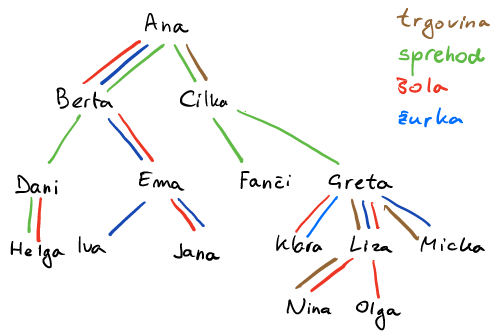


V Pythonu pa bo to zapisano s slovarjem slovarjev množic. Razmisli in razumi.

In [1]:
stiki = {"Ana": {"Berta": {"šola", "sprehod", "žurka"},
                 "Cilka": {"sprehod", "trgovina"}},
         "Berta": {"Dani": {"sprehod"},
                   "Ema": {"šola", "žurka"}},
         "Cilka": {"Fanči": {"sprehod"},
                   "Greta": {"sprehod"}},
         "Dani": {"Helga": {"sprehod", "šola"}},
         "Ema": {"Iva": {"žurka"},
                 "Jana": {"šola", "žurka"}},
         "Greta": {"Klara": {"šola", "žurka"},
                   "Liza": {"trgovina", "šola", "žurka"},
                   "Micka": {"trgovina", "žurka"}},
         "Liza": {"Nina": {"trgovina", "šola"},
                  "Olga": {"šola"}}
         }

Vse funkcije, ki jih bo potrebno napisati bodo rekurzivne. Globalne spremenljivke so sicer grda reč, tu pa bodo funkcije, zato da bodo njihovi argumenti jasnejši, brale podatke kar iz globalne spremenljivke z imenom `stiki`. (Tako kot smo na predavanjih brali iz globalne spremenljivke `otroci`, ne da bi razmišljali o tem grehu.)

Funkcije morajo biti splošne: ne smete predpostaviti, da imajo osebe natančno takšna imena in da hodijo le v šolo, trgovino, na sprehode in žurke. Da bo res tako, bodo testi vaše funkcije najprej testirali s temi imeni in aktivnostmi, nato pa bodo ta imena zamenjali še z naključno generiranimi nizi.

## Obvezne naloge

- Napiši funkcijo `stevilo_okuzenih(oseba)`, ki prejme ime osebe in vrne število vseh, ki so okuženi zaradi te osebe (in še to osebo zraven).

    Klic `stevilo_okuzenih("Berta")` vrne `6`, ker so po Bertini zaslugi okužene Dani, Ema, Helga, Iva, Jana in še Berta sama (sama si je kriva, kaj pa je žurala z Ano).

    (Da, tu zadošča gledati zgolj ključe "podslovarjev", ne pa vrednosti. Pomembno je le, da je bila Ana v stiku z Berto in Cilko; kaj so počele, pa ni pomembno.)

- Napiši funkcijo `rekord(oseba)`, ki vrne največje število oseb, ki jih je okužila posamezna oseba izmed tistih, ki so bile okužene zaradi osebe, podane kot argument. Tudi tu upoštevaj tudi osebo samo.

    Klic `rekord("Ana")` vrne `3`, saj je med Aninimi okuženci Greta, ki je okužila tri osebe. Prav tako klic `rekord("Greta")` vrne 3, zaradi Grete same. Klic `rekord("Berta")` pa vrne 2, zaradi Berte ali Eme. Klic `rekord("Dani")` vrne 1 in klic `rekord("Helga")` vrne 0.

### Rešitev

#### `stevilo_okuzenih`

Funkcija `stevilo_okuzenih` je očitno enaka funkciji velikost rodbine, ki smo jo napisali na predavanjih. Vsak je okužil sebe, potem pa toliko ljudi, kolikor se jih je okužilo zaradi vsakega od tistih, ki so se okužili od njega.

In [2]:
def stevilo_okuzenih(oseba):
    if oseba not in stiki:
        return 1
    okuzenih = 1
    for okuzenec in stiki[oseba]:
        okuzenih += stevilo_okuzenih(okuzenec)
    return okuzenih

stevilo_okuzenih("Berta")

6

`if` na začetku funkcije služi le temu, da poskrbi za tiste, ki niso okužili nikogar in jih zato ni v slovarju `okuzbe`. Lahko pa se mu brez težav izognemo.

In [3]:
def stevilo_okuzenih(oseba):
    okuzenih = 1
    for okuzenec in stiki.get(oseba, ()):
        okuzenih += stevilo_okuzenih(okuzenec)
    return okuzenih

stevilo_okuzenih("Berta")

6

Če je `oseba` v slovarju `okuzbe`, klic `okuzbe.get(oseba, ())` vrne pripadajočo vrednost. Če je ni, bo vrnil privzeto vrednost, ki smo jo podali kot drugi argument. Ta je prazna terka, `()`. Zanka `for` bo tekla čez prazno terko - torej ne bo naredila ničesar.

Kdor zna tudi, kar smo se učili tik pred rekurzijo, pa funkcijo napiše tako:

In [4]:
def stevilo_okuzenih1(oseba):
    return 1 + sum(stevilo_okuzenih(okuzenec)
                   for okuzenec in stiki.get(oseba, ()))

stevilo_okuzenih("Berta")

6

#### `rekord`

Funkcija `rekord` pa je enaka funkciji, s katero smo izvedeli, kdo v rodbini ima največ otrok. Vsak najprej predpostavi, da je to on, nato pa vpraša vse okužene, kdo je "najuspešneji okuževalec" (ta humor je nekoliko bolan, te stvari so žal smrtno resne) med temi, ki so jih okužili oni.

Seznam teh, ki jih je okužila oseba, bomo spet dobili s klicem `okuzbe.get(oseba, ())`, ki bo za tiste, ki niso okužili nikogar, vrnil prazno terko.

In [5]:
def rekord(oseba):
    okuzenci = stiki.get(oseba, ())
    naj = len(okuzenci)
    for okuzenec in okuzenci:
        rek = rekord(okuzenec)
        if rek > naj:
            naj = rek
    return naj

In [6]:
rekord("Ana")

3

In [7]:
rekord("Berta")

2

In [8]:
rekord("Dani")

1

In [9]:
rekord("Helga")

0

Krajše pa tako:

In [10]:
def rekord(oseba):
    okuzenci = okuzbe.get(oseba, ())
    return max([len(okuzenci)]
               + [rekord(okuzenec) for okuzenec in okuzenci])

Če bi hoteli na vsak način to stlačiti v eno vrstico, bi opustili spremenljivko `okuzenci` in namesto tega dvakrat poklicali `okuzbe.get(oseba, ())`, vendar to ni niti lepo niti potrebno.

## Dodatne naloge

V gornjih nalogah nas ni zanimal razlog okužbe. Če želimo pomagati vladi uvesti pametna pravila, pa se bo potrebno poglobiti še v razloge.

- Najprej nas zanima, kako nevarna je posamezna aktivnost. Zato napiši funkcijo `nevarnost(oseba, razlog)`, ki vrne število okužb, ki jih je (neposredno ali posredno) povzročila `oseba`, pri katerih je bil eden od razlog (ali edini razlog) razlog, ki je podan kot argument. Grafično, funkcija mora prešteti, koliko povezav v drevesu pod podano osebo je takšne barve, ki ustreza razlogu.

    Klic `nevarnost("Ana", "trgovina")` vrne `4`, ker so pod Ano štiri rjave povezave.

    Tu upoštevaj, da se okužbe širijo le navzdol. Če bi se okužba začela pri Greti, ta vseeno ne more okužiti Cilke, ker se je z njo (recimo) sprehajala, še preden je zbolela.

- A to mogoče ni to, kar nas v resnici zanima. Zanima nas, koliko bi bilo okuženih, če bi se bilo možno okuževati le na določen način. Vzemimo, da se da okužiti le v trgovini. Če bi okužbo poleti (ponovno) uvozila le Ana, bi bili v tem primeru bolni le dve, Ana in Cilka. Do Lize, Micke in Nine ta okužba ne bi prišla, saj je povezava med Cilko in Greto zelena (sprehod). Če pa bi bila nevarna šola (in okužbo spet začnemo pri Ani), zbolijo štiri (Ana, Berta, Ema in Jana). Če bi bili nevarni sprehodi, jih zboli sedem (Ana, Berta, Cilka, Dani, Fanči, Greta in Helga).

    Napiši torej funkcijo `okuzbe_zaradi(oseba, razlog)`, ki prejme osebo, ki začne okužbo in razlog širjenja okužbe, ki nas zanima. Vrniti mora število okuženih, kot ga kažejo gornji primeri.

    Klic `okuzbe_zaradi("Ana", "šola")` vrne 4.

- Po ponovnem premisleku pa vidimo, da je narobe tudi to. V bistvu nas zanima število okužb, do katerega bo prišlo, če prepovemo določeno množico aktivnosti. Če, recimo, prepovemo sprehajanje in nakupovanje, okužba pa se začne pri Ani, bo okuženih pet oseb, namreč Ana, Berta, Ema, Iva in Jana. Če prepovemo le sprehajanje, pa bo pravzaprav podobno -- okuženih bo šest oseb, namreč prejšnjih pet in še Cilka zraven.

    Napiši funkcijo `okuzbe_brez(oseba, prepovedane)`, ki prejme ime osebe in množico prepovedanih aktivnosti. Funkcija vrne število okuženih.
    
    Klic `okuzbe_brez("Ana", {"sprehod", "trgovina"})` vrne `5`.


### Rešitev

#### `nevarnost`

Funkcija je podobna funkciji `stevilo_potomcev`, ki smo jo omenili pri rodbini (najdete jo  v zapiskih), le da moramo tu preverjati še razlog okužbe.

Kot si lahko ogledamo v funkciji `stevilo_potomcev`, je tu bolj smiselno začeti z `okuzenih = 0` in potem v zanki dodati `1` za vsakega otroka.

Preden prištejemo `1`, pa moramo dodati pogoj. Poprej je šla zanka le prek ključev `for okuzenec in (...)`, ki so predstavljali imena oseb. Zdaj bomo potrebovali tudi pripadajoče vrednosti, torej množice, ki povedo, v kakšnih kontekstih sta se osebi srečali, torej `for okuzenec, srecanja in (...)`. Da dobimo pare (ključ, vrednost) bomo poklicali `items(), tako:

```python
for okuzenec, srecanja in okuzbe.get(oseba, {}).items():
```

Ne spreglejte, da privzeti argument za `get` zdaj ni več prazna terka temveč prazen slovar, `{}`. Tega bi *lahko* uporabili tudi prej. Zdaj pa ga *moramo*, ker na rezultatu, ki ga vrne `get` pokličemo `items`. Terke metode `items` seveda nimajo, zato jo kličemo na ((včasih) praznem) slovarju.

In [11]:
def nevarnost(oseba, razlog):
    okuzenih = 0
    for okuzenec, srecanja in stiki.get(oseba, {}).items():
        if razlog in srecanja:
            okuzenih += 1
        okuzenih += nevarnost(okuzenec, razlog)
    return okuzenih

nevarnost("Ana", "trgovina")

4

Namesto 

```python
        if razlog in srecanja:
            okuzenih += 1
```

bi lahko pisali kar

```python
        okuzenih += razlog in srecanja
```

saj je `razlog in srecanja` enak `True` ali `False`, kar je isto kot `1` in `0`. In tako pridemo do krajše rešitve,

In [12]:
def nevarnost(oseba, razlog):
    okuzenih = 0
    for okuzenec, srecanje in stiki.get(oseba, {}).items():
        okuzenih += (razlog in srecanje) + nevarnost(okuzenec, razlog)
    return okuzenih

nevarnost("Ana", "trgovina")

4

odtod pa je le še kratek skok do

In [13]:
def nevarnost(oseba, razlog):
    return sum((razlog in srecanja) + nevarnost(okuzenec, razlog)
               for okuzenec, srecanja in stiki.get(oseba, {}).items())

nevarnost("Ana", "trgovina")

4

#### `okuzbe_zaradi`

Vrnimo se k prvi različici funkcije `nevarnost`. Vrstica `okuzenih += nevarnost(okuzenec, razlog)` ni znotraj `if`-a, ker naloga zahteva, da preštejemo vse okužbe, do katerih je prišlo zaradi določenega tipa srečanj. Če bi vrstico postavili znotraj `if`-a, pa bi računali, koliko bi bilo okužb (začenši z osebo), če bi obstajal le ta tip srečanj. Tako, kot je napisana zdaj, pa dovoli, da se okužbe vmes prenašajo tudi na druge način. Tu se lahko, recimo, zgodi, da `oseba` ni hodila v trgovino, temveč je okužila le nekaj oseb na sprehodih, potem pa so ti naprej okuževali v trgovini. Ker je `if` izven zanke, te okužbe štejejo. Če bi bila v zanki, pa bi se štetje s tem, ko `oseba` ni šla v trgovino, prekinilo.

Za funkcijo `okuzbe_zaradi` moramo le prestaviti rekurzivni klic v `if`. Poleg tega zdaj drugače štejemo ljudi: med okužene šteje tudi oseba, ki smo jo podali kot argument funkciji. Zato je samo štetje podobno kot v funkciji `stevilo_okuzenih`: vedno `1` za osebo samo, k temu pa prištevamo vse, kar prispevajo rekurzivni klici.

In [14]:
def okuzbe_zaradi(oseba, razlog):
    okuzenih = 1
    for okuzenec, srecanja in stiki.get(oseba, {}).items():
        if razlog in srecanja:
            okuzenih += okuzbe_zaradi(okuzenec, razlog)
    return okuzenih

okuzbe_zaradi("Ana", "šola")

4

ali

In [15]:
def okuzbe_zaradi(oseba, razlog):
    return 1 + sum(okuzbe_zaradi(okuzenec, razlog)
                   for okuzenec, srecanja in stiki.get(oseba, {}).items()
                   if razlog in srecanja)
                   
okuzbe_zaradi("Ana", "šola")

4

#### `okuzbe_brez`

V zadnji funkciji, `okuzbe_brez` spremenimo le pogoj: zanima nas, ali sta se osebi srečali na katerega od neprepovedanih načinov, torej, ali je množica `srecanja - prepovedani` neprazna.

In [16]:
def okuzbe_brez(oseba, prepovedani):
    okuzenih = 1
    for okuzenec, srecanja in stiki.get(oseba, {}).items():
        if srecanja - prepovedani:
            okuzenih += okuzbe_brez(okuzenec, prepovedani)
    return okuzenih
    
okuzbe_brez("Ana", {"sprehod", "trgovina"})

5

In, spet, krajše:

In [17]:
def okuzbe_brez(oseba, prepovedani):
    return 1 + sum(okuzbe_brez(okuzenec, prepovedani)
                   for okuzenec, srecanja in stiki.get(oseba, {}).items()
                   if srecanja - prepovedani)

okuzbe_brez("Ana", {"sprehod", "trgovina"})

5

## Še par nalog za vajo


Za te funkcije ni priloženih testov.

- Poleg funkcije `stevilo_okuzenih` napiši še funkcijo `seznam_okuzenih`, ki namesto števila okuženih vrne seznam.

- Poleg funkcije `rekord` napiši funkcijo `zlati_prinasalec`, ki namesto največjega števila okuženih vrne ime tistega, ki je okužil največ ljudi. Če je takšnih več, vrne prvega po abecedi.

- Poleg funkcije `stevilo_okuzenih` napiši funkcijo `stevilo_zrtev`, ki vrne število žrtev te osebe. Torej 1 manj kot bi vrnila funkcija `stevilo_okuzenih`. Funkcije ne napiši tako, da le pokliče število okuženih in odšteje 1, temveč naj bo to rekurzivna funkcija, ki kliče sebe in ne drugih funkcij.


### Rešitev

#### `stevilo_okuzenih`

Tule v bistvu iščemo vse člane rodbine. Vsak sestavi spisek, na katerega da sebe. Nato vsakega od teh, ki jih je okužil, vpraša za njihove spiske in jih prišteje k svojemu.

In [18]:
def seznam_okuzenih(oseba):
    okuzeni = [oseba]
    for okuzenec in stiki.get(oseba, ()):
        okuzeni += seznam_okuzenih(okuzenec)
    return okuzeni
    
seznam_okuzenih("Berta")

['Berta', 'Dani', 'Helga', 'Ema', 'Iva', 'Jana']

Če hočemo to napisati krajše, si tokrat ne moremo pomagati s `sum`, ker zna seštevati le števila, ne pa tudi seznamov. Potrebujemo `reduce`, ki smo ga na hitro spoznali pri prejšnjih dodatnih nalogah.

In [19]:
from functools import reduce
from operator import add

def seznam_okuzenih(oseba):
    return [oseba] + reduce(add,
                            (seznam_okuzenih(okuzenec)
                             for okuzenec in stiki.get(oseba, ())),
                            [])
    
seznam_okuzenih("Berta")

['Berta', 'Dani', 'Helga', 'Ema', 'Iva', 'Jana']

Ali, z neko drugo magijo, ki je ne bom niti razlagal.

In [20]:
from itertools import chain

def seznam_okuzenih(oseba):
    return [oseba] + list(chain(*(seznam_okuzenih(okuzenec)
                                  for okuzenec in stiki.get(oseba, ()))))
    
seznam_okuzenih("Berta")

['Berta', 'Dani', 'Helga', 'Ema', 'Iva', 'Jana']

Ali, s tretjo magijo.

In [21]:
def seznam_okuzenih(oseba):
    return [oseba] + list(chain(*map(seznam_okuzenih, stiki.get(oseba, ()))))

seznam_okuzenih("Berta")

['Berta', 'Dani', 'Helga', 'Ema', 'Iva', 'Jana']

#### `zlati_prinasalec`

Problem funkcije `zlati_prinasalec` je v tem, da mora vrniti ime osebe, primerjati pa jih mora po številu okuženih. Funkcija zatorej ne vrača tistega, kar bi potrebovali v rekurzivnem klicu. Seveda bi lahko vračala le imena in bi za vsako ime znova preštevali, koliko jih okuži - vendar ugotavljanja števila okuženih ni hitro, saj zahteva preiskovanje celega drevesa. Zato problem raje rešimo tako, da napišemo rekurzivno funkcijo `zlati_prinasalec0`, ki vrača oboje. Funkcija `zlati_prinasalec` pa pokliče `zlati_prinasalec0`, a vrne le ime.

In [22]:
def zlati_prinasalec0(oseba):
    okuzenci = stiki.get(oseba, ())
    naj_oseba, naj_stevilo = oseba, len(okuzenci)
    for okuzenec in okuzenci:
        ta_oseba, to_stevilo = zlati_prinasalec0(okuzenec)
        if to_stevilo > naj_stevilo or (to_stevilo == naj_stevilo and ta_oseba < naj_oseba):
            naj_oseba, naj_stevilo = ta_oseba, to_stevilo
    return naj_oseba, naj_stevilo

def zlati_prinasalec(oseba):
    return zlati_prinasalec0(oseba)[0]
    
zlati_prinasalec("Ana")

'Greta'

Funkcija `stevilo_zrtev` se od `stevilo_okuzenih` razlikuje tako, kot se `velikost_rodbine` od `stevilo_potomcev`.